## データ取り込み

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
train_df = pd.read_csv('../data/input/train.csv')
test_df = pd.read_csv('../data/input/test.csv')
gen_sub_df = pd.read_csv('../data/input/gender_submission.csv')

In [76]:
display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## データ分析

### データタイプ確認

In [77]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 欠損値確認

In [48]:
display(train_df.isnull().sum())
display(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 要約統計量確認

In [67]:
display(train_df.describe())
display(test_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### ペアプロット作成

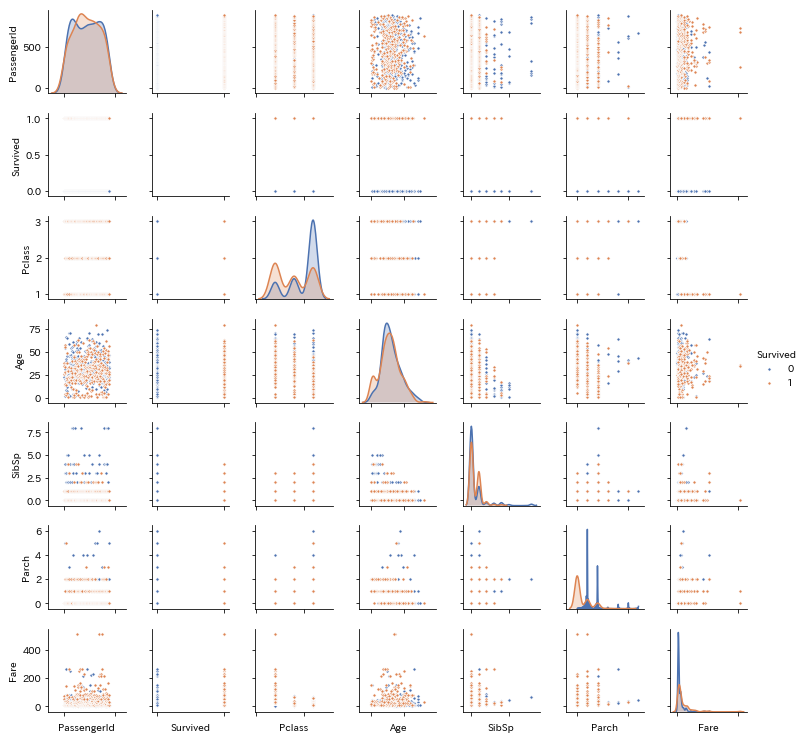

In [66]:
#ペアプロット作成
pp = sns.pairplot(train_df, hue = 'Survived', palette = 'deep', size=1.5, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

### 相関ヒートマップ作成

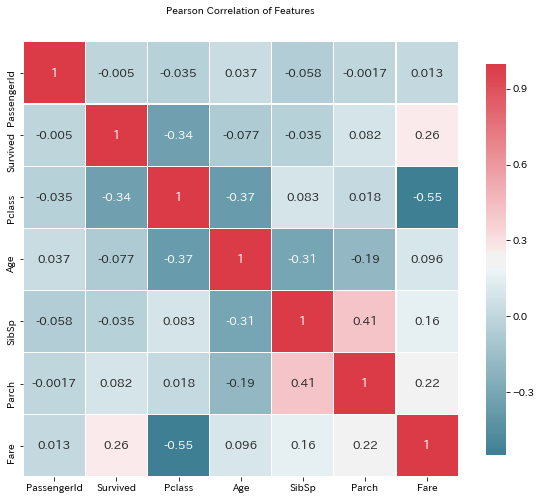

In [159]:
#相関のヒートマップ作成
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=10)

correlation_heatmap(train_df)

## データ加工

### データの分解、結合

In [141]:
train_df_cp = train_df.copy()
test_df_cp = test_df.copy()

Y = train_df_cp['Survived']
train_df_cp = train_df_cp.drop('Survived',axis=1)

train_df_cp['cat'] = 'train'
test_df_cp['cat'] = 'test'
X_all = pd.concat([train_df_cp,test_df_cp],axis=0)

### 欠損値の補完

In [94]:
# 年齢、料金は中央値で、embarkは最頻値で補完
X_complement = X_all.copy()
X_complement['Age'] = X_complement['Age'].fillna(X_complement['Age'].median())
X_complement['Embarked'] =  X_complement['Embarked'].fillna(X_complement['Embarked'].mode()[0])
X_complement['Fare'] = X_complement['Fare'].fillna(X_complement['Fare'].median())

In [98]:
X_complement.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
cat               0
dtype: int64

### ラベル付

In [128]:
X_label = X_complement.copy()

X_label['Cabin'] = X_label['Cabin'].str[0]
X_label['Cabin'] = X_label['Cabin'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8,np.nan:0})

X_label['Sex'] = X_label['Sex'].map({'male':0,'female':1})

### 不要な特徴量の削除

In [129]:
X_drop = X_label.drop(['Name','Ticket'],axis=1)

### One-hot-vectorを作成

In [131]:
X_ohe = pd.get_dummies(X_drop)

In [133]:
X_ohe.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,cat_test,cat_train
0,1,3,0,22.0,1,0,7.2500,0,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,3,1,0,0,0,1
2,3,3,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,3,0,0,1,0,1
4,5,3,0,35.0,0,0,8.0500,0,0,0,1,0,1


### データの分解

In [291]:
X = X_ohe[X_ohe['cat_train']==1]
X_submit =  X_ohe[X_ohe['cat_test']==1]

X = X.drop(['cat_train','cat_test'],axis=1)
X_submit = X_submit.drop(['cat_train','cat_test'],axis=1)

## 特徴量選択

In [144]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [150]:
rf = RandomForestRegressor(n_estimators=100, max_features='auto',max_depth=30)

# 特徴量削減
rfecv = RFECV(estimator=rf, step=1, cv=2)

# 学習
rfecv.fit(X,Y)

RFECV(cv=2,
   estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

Feature ranking: 
[1 1 1 1 1 1 1 1 2 3 1]


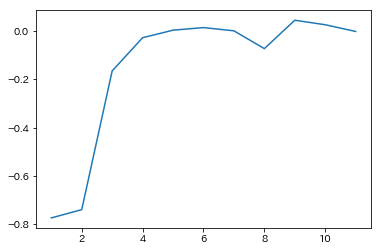

In [151]:
print('Feature ranking: \n{}'.format(rfecv.ranking_))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [152]:
from sklearn.feature_selection import SelectPercentile, chi2

# 20%(6個)の特徴量を選択
transformed_X = SelectPercentile(chi2, percentile=70).fit_transform(X,Y)

print('Transformed X shape: {}'.format(transformed_X.shape))

Transformed X shape: (891, 7)


In [153]:
transformed_X

array([[ 3.    ,  0.    , 22.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  3.    ,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  7.925 ,  0.    ,  0.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ..., 23.45  ,  0.    ,  0.    ],
       [ 1.    ,  0.    , 26.    , ..., 30.    ,  3.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  7.75  ,  0.    ,  0.    ]])

## モデル実行

In [300]:
from sklearn.model_selection import train_test_split
X1 = X[["Pclass", "Sex", "Age", "Fare"]]

X_train, X_test, Y_train, Y_test = train_test_split(X1,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0)

# 学習用データ、検証用データの分割の正常終了を確認する
display(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(623, 4)

(268, 4)

(623,)

(268,)

In [309]:
display(gen_sub_df['Survived'].shape)
display(X_submit.shape)

(418,)

(418, 11)

In [310]:
# scikit-learnのインポートをします
from sklearn import tree

# 決定木の作成
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)

display(np.sqrt(mean_squared_error(Y_train, dt.predict(X_train))))
display(np.sqrt(mean_squared_error(Y_test, dt.predict(X_test))))
display(np.sqrt(mean_squared_error(gen_sub_df['Survived'], dt.predict(X_submit[["Pclass", "Sex", "Age", "Fare"]]))))
# display(np.sqrt(mean_squared_error(gen_sub_df['Survived'], dt.predict(X_submit))))

0.15516780126352459

0.436232171512701

0.47168637703193417

In [312]:
dt.predict(X_submit[["Pclass", "Sex", "Age", "Fare"]]).shape

(418,)

In [314]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(rf.predict(X_submit[["Pclass", "Sex", "Age", "Fare"]]), gen_sub_df['PassengerId'], columns = ["Survived"])
 
# my_tree_one.csvとして書き出し
my_solution.to_csv("rf.csv", index_label = ["PassengerId"])



In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

rf = RandomForestClassifier(n_estimators=400,max_depth = 3)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [273]:
display(np.sqrt(mean_squared_error(Y_train, rf.predict(X_train))))
display(np.sqrt(mean_squared_error(Y_test, rf.predict(X_test))))

0.4139424049390707

0.42936877145344576

In [262]:
display(np.sqrt(mean_squared_error(gen_sub_df['Survived'], rf.predict(X_submit))))

0.3788676152120412

In [261]:
gen_sub_df['Survived']

0      0
1      1
2      0
3      0
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [254]:
X_submit.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

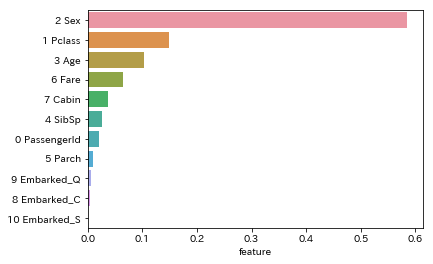

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
feature=rf.feature_importances_
f = pd.DataFrame({'number': range(len(feature)),'name':X_train.columns.values,
             'feature': feature[:]}).sort_values('feature',ascending=False)
sns.barplot(x=f['feature'].head(20),y=f['number'].head(20).astype(str)+' '+f['name'].head(20))
plt.show()